# Assignment 5 - Artificial Neural Networks
## 0813366 黃柏翔

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

f = open('train.json')
data = json.load(f)

## Data Visualization 

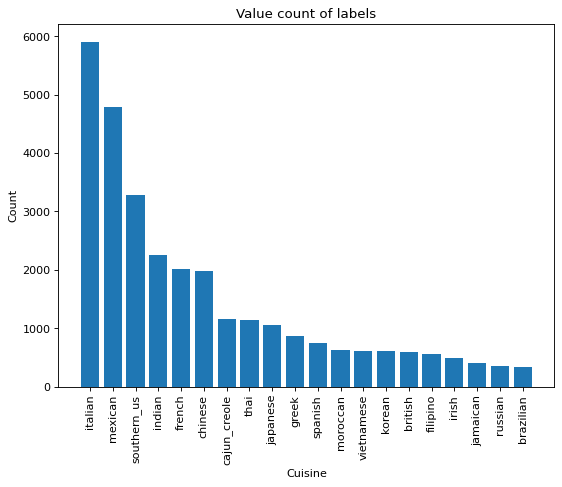

In [2]:
label_dict = dict()
for d in data:
    if d['cuisine'] in label_dict.keys():
        label_dict[d['cuisine']] += 1
    else:
        label_dict[d['cuisine']] = 1

label_dict = sorted(label_dict.items(), key=lambda f: f[1],reverse=True)
label = [l[0] for l in label_dict]
count = [c[1] for c in label_dict]

plt.figure(figsize=(8, 6), dpi=80)
plt.bar(label, count)

plt.xticks(rotation=90)
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.title('Value count of labels')
plt.show()


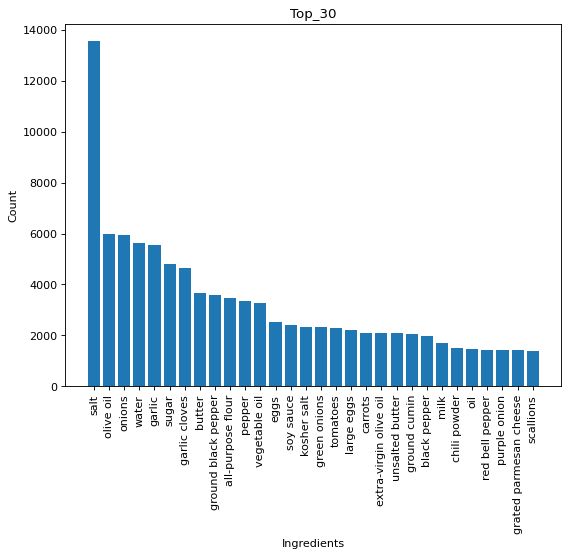

In [3]:
food = dict()

for d in data:
    for f in d['ingredients']:
        if f in food.keys():
            food[f] += 1
        else:
            food[f] = 1

top30_food = sorted(food.items(), key=lambda f: f[1],reverse=True)[:30]
foods = [f[0] for f in top30_food]
count = [c[1] for c in top30_food]

plt.figure(figsize=(8, 6), dpi=80)
plt.bar(foods, count)

plt.xticks(rotation=90)
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.title('Top_30')
plt.show()


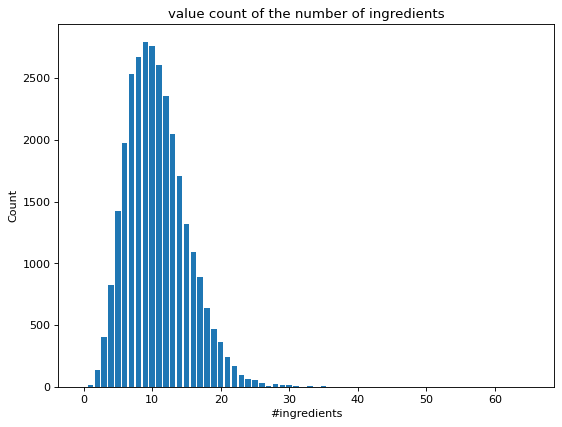

In [4]:
length = []
for d in data:
    length.append(len(d['ingredients']))
                        
count = np.array([0]*(np.array(length).max()+1))

for num in length:
    count[num]+=1
    
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(range(np.array(length).max()+1),count)

plt.xlabel('#ingredients')
plt.ylabel('Count')
plt.title('value count of the number of ingredients')
plt.show()


## preprocessing

In [5]:
df = pd.DataFrame([[0]*(len(food.keys())+1)]*len(data),columns = [list(food.keys())+['label']])

for i,d in enumerate(data):
    for f in d['ingredients']:
        df.loc[i,f] = 1
    df.loc[i,'label'] = d['cuisine']

df

,egg whites,pecans,agave nectar,ground cinnamon,sea salt,large egg whites,whole milk,bread crumb fresh,large eggs,lemon wedge,...,low-fat canned coconut milk,Bartlett Pear,meat fats,brown rice penne,belacan,digestive biscuit,carnation condensed milk,legumes,Classico Pasta Sauce,label
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,southern_us
1,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,greek
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,cajun_creole
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,korean
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,greek
29770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mexican
29771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,french
29772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,mexican


In [6]:
df = pd.get_dummies(df)
ohe_to_label = {}

df.columns[-20:]
for i, l in enumerate(df.columns[-20:]):
    ohe_to_label[i] = l[11:]

# labels
ohe_to_label

{0: 'brazilian',
 1: 'british',
 2: 'cajun_creole',
 3: 'chinese',
 4: 'filipino',
 5: 'french',
 6: 'greek',
 7: 'indian',
 8: 'irish',
 9: 'italian',
 10: 'jamaican',
 11: 'japanese',
 12: 'korean',
 13: 'mexican',
 14: 'moroccan',
 15: 'russian',
 16: 'southern_us',
 17: 'spanish',
 18: 'thai',
 19: 'vietnamese'}

In [7]:
from sklearn.model_selection import train_test_split
# 7:3 split
#X_train, X_validation, y_train, y_validation = train_test_split(df.iloc[:,:-20],df.iloc[:,-20:], test_size=0.3, random_state=87)
X_train = df.iloc[:,:-20]
y_train = df.iloc[:,-20:]


In [11]:
df

,"(egg whites,)","(pecans,)","(agave nectar,)","(ground cinnamon,)","(sea salt,)","(large egg whites,)","(whole milk,)","(bread crumb fresh,)","(large eggs,)","(lemon wedge,)",...,"('label',)_jamaican","('label',)_japanese","('label',)_korean","('label',)_mexican","('label',)_moroccan","('label',)_russian","('label',)_southern_us","('label',)_spanish","('label',)_thai","('label',)_vietnamese"
0,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
29771,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


**因為relu直接忽視負值，一開始先用relu快速收斂**  
**最後因為是多種分類，選擇用softmax找出機率最大的結果**

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping 

model = Sequential()

model.add(Dense(units=64, kernel_initializer='normal', activation='relu')) 
model.add(Dense(units=len(label), kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam') 

callback = EarlyStopping(monitor='val_loss', mode = 'min', patience=1)
train_history = model.fit(x=X_train, y=y_train, validation_split = 0.2, epochs=100, batch_size=2000, verbose = 0, callbacks=[callback])  

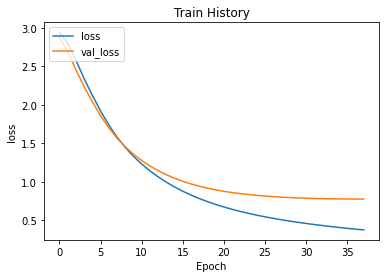

In [12]:
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['loss', 'val_loss'], loc='upper left')  
plt.show() 

## Result

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# predictions = model.predict(X_validation)

# # print('confusion matrix\n\n',confusion_matrix( np.argmax(y_validation.values, axis=-1),np.argmax(predictions, axis=-1)))
# print(classification_report(np.argmax(predictions, axis=-1), np.argmax(y_validation.values, axis=-1)))
# pd.crosstab(np.argmax(y_validation.values, axis=-1), np.argmax(predictions, axis=-1), rownames=['True'], colnames=['Pred'])

## Conclusion  
一開始只有用一層softmax，但結果只有74%左右  
後來想說可能是因為資料的維度比較大，要一層直接預測完效果會比較差  
於是又多加了幾層，結果發現多加幾層也不一定比較好QQ
多試了幾次得到77%左右的準確率

另外，在preprocessing的地方  
因為沒辦法直接把json丟成df的格式，加上每道料理所使用的食材不一定有重疊  
只好土法煉鋼先創一個很大的df之後再一個一個填有沒有該項食材
想請問助教有沒有比較快的方法，那個cell大概是整個Code最花時間的QQ

## Kaggle submission

In [13]:
file = open('test.json')
test_data = json.load(file)

df_test = pd.DataFrame([[0]*(len(food.keys()))]*len(test_data),columns = list(food.keys()))


for i,d in enumerate(test_data):
    for fd in d['ingredients']:
        if fd in food.keys():
            df_test.loc[i,fd] = 1




In [14]:
predictions =  model.predict(df_test)


import csv
with open('y_test.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)

    writer.writerow(['id', 'Category'])

    for i, pred in enumerate(predictions):
        writer.writerow([test_data[i]['id'], ohe_to_label[pred.argsort()[-1]]])

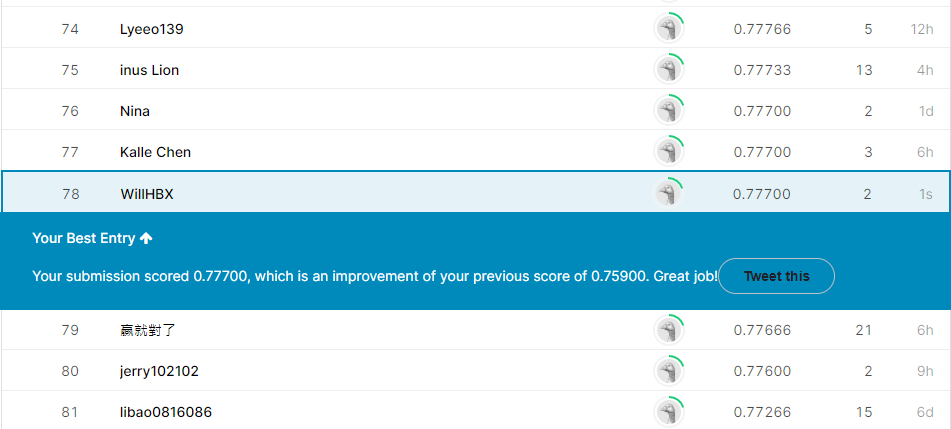